In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Replace this with the path to your Parquet file
file_path = r'C:\Users\200408\OneDrive - Betonmast\Skrivebord\NTNU\Prosjektoppgave\raw_parquetfiles\meassurement_converted_2023\08\20230801073328.parquet'
data = pd.read_parquet(file_path)
display(data)

In [1]:
dfs = []

for file_name in os.listdir(file_path):
    if file_name.endswith('.parquet'):
        full_file_path = os.path.join(file_path, file_name)
        try:
            df = pd.read_parquet(full_file_path)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file {full_file_path}: {e}")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    print("No Parquet files found in the directory.")

display(combined_df)

20230504002729.parquet
20230504012730.parquet
20230504022731.parquet
20230504032732.parquet
20230504042733.parquet
20230504052734.parquet
20230504062735.parquet
20230504072736.parquet
20230504082737.parquet
20230504092738.parquet
20230504102739.parquet
20230504112740.parquet
20230504122741.parquet
20230504132742.parquet
20230504142743.parquet
20230504152744.parquet
20230504162745.parquet
20230504172746.parquet
20230504182747.parquet
20230504192748.parquet
20230504202749.parquet
20230504212750.parquet
20230504222751.parquet
20230504232752.parquet


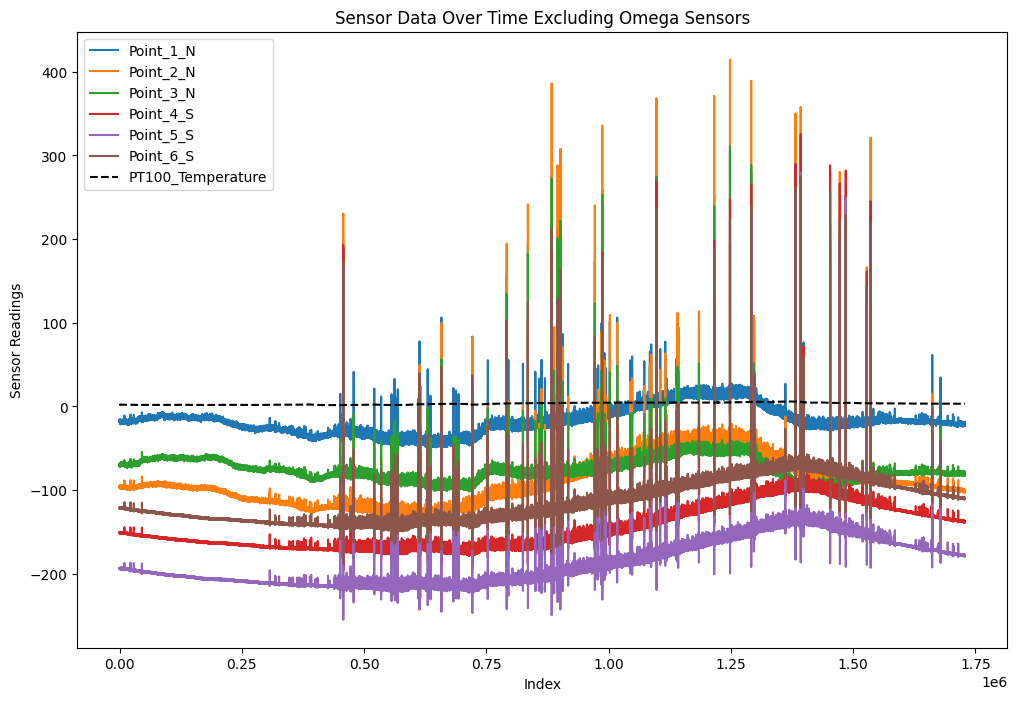

In [3]:
df = pd.DataFrame(combined_df)

# Exclude specific columns by name
exclude_columns = ['Days_since_2019.12.31', 'Date', 'PT100_Temperature']
sensor_columns = [col for col in df.columns if col not in exclude_columns]

# Plot sensor data over time
plt.figure(figsize=(12, 8))
for column in sensor_columns:
    plt.plot(df.index, df[column], label=column)

# Plot temperature data
plt.plot(df.index, df['PT100_Temperature'], label='PT100_Temperature', linestyle='--', color='black')

plt.legend()
plt.title('Sensor Data Over Time Excluding Omega Sensors')
plt.xlabel('Index')
plt.ylabel('Sensor Readings')
plt.show()

**Single sensor with temprature**

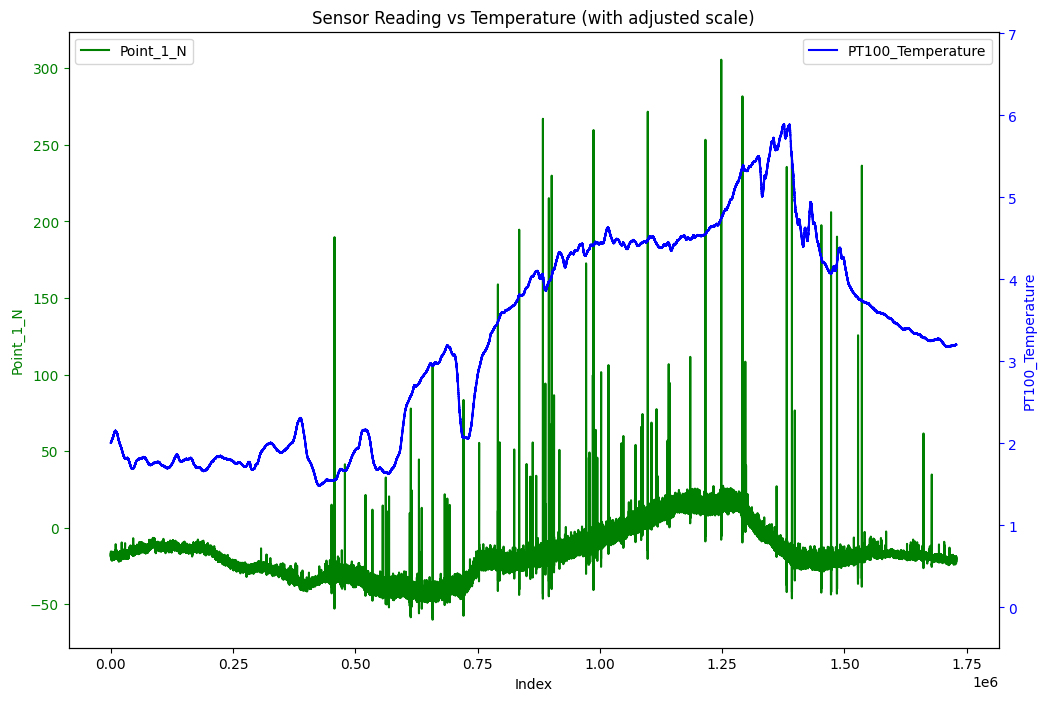

In [5]:
temp_std = df['PT100_Temperature'].std()
temp_mean = df['PT100_Temperature'].mean()
temp_ylim = (temp_mean - 3*temp_std, temp_mean + 3*temp_std)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the first sensor
ax1.plot(df.index, df[sensor_to_plot], 'g-', label=sensor_to_plot)
ax1.set_xlabel('Index')
ax1.set_ylabel(sensor_to_plot, color='g')
ax1.tick_params('y', colors='g')

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df.index, df['PT100_Temperature'], 'b-', label='PT100_Temperature')
ax2.set_ylabel('PT100_Temperature', color='b')
ax2.tick_params('y', colors='b')
ax2.set_ylim(temp_ylim)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Sensor Reading vs Temperature (with adjusted scale)')
plt.show()

**Experimental plot with rolling meadian over sensor data**

C:\Users\200408\AppData\Local\Temp\ipykernel_4264\3953746625.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_actual['Point_5_S_filtered'].fillna(method='bfill', inplace=True)
C:\Users\200408\AppData\Local\Temp\ipykernel_4264\3953746625.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_actual['Point_5_S_filtered'].fillna(method='ffill', inplace=True)


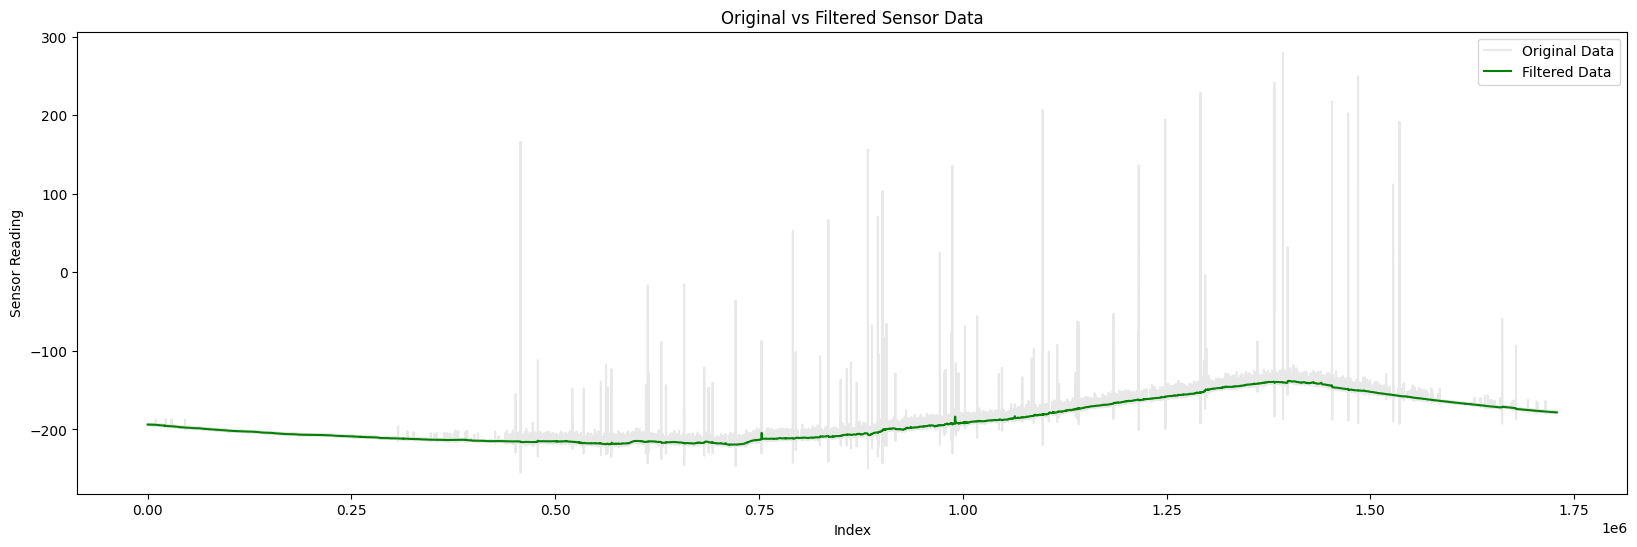

In [8]:
df_rolling_median = combined_df.copy()  # Make a copy to avoid modifying the original DataFrame (Note: Suggested by GitHub CoPiLot)

window_size = 1000 

# Rolling median filter
df_rolling_median['Point_5_S_filtered'] = df_rolling_median['Point_5_S'].rolling(window=window_size, center=True).median()

# Handle NaN values resulting from the rolling operation
df_rolling_median['Point_5_S_filtered'] = df_rolling_median['Point_5_S_filtered'].fillna(method='bfill')
df_rolling_median['Point_5_S_filtered'] = df_rolling_median['Point_5_S_filtered'].fillna(method='ffill')

plt.figure(figsize=(20, 6))
plt.plot(df_rolling_median['Point_5_S'], label='Original Data', color='lightgrey', alpha=0.5)
plt.plot(df_rolling_median['Point_5_S_filtered'], label='Filtered Data', color='green')
plt.legend()
plt.title('Original vs Filtered Sensor Data')
plt.xlabel('Index')
plt.ylabel('Sensor Reading')
plt.show()


**Single sensor with temprature (Rolling average used)**

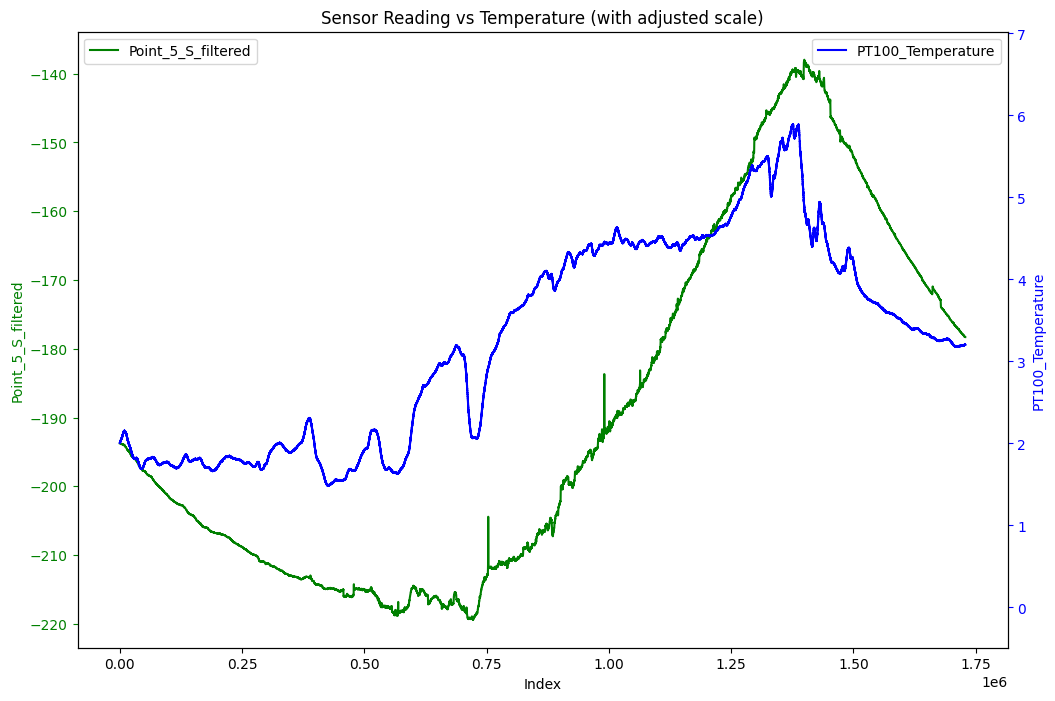

In [9]:
# Note: The following code is written more concise using ChatGPT's code generation capabilities.
sensor_to_plot = 'Point_5_S_filtered'

# Calculate temperature statistics
temp_std = df['PT100_Temperature'].std()
temp_mean = df['PT100_Temperature'].mean()
temp_ylim = (temp_mean - 3 * temp_std, temp_mean + 3 * temp_std)

# Plot sensor data and temperature on the same plot
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_rolling_median.index, df_rolling_median[sensor_to_plot], 'g-', label=sensor_to_plot)
ax1.set_xlabel('Index')
ax1.set_ylabel(sensor_to_plot, color='g')

ax2 = ax1.twinx()
ax2.plot(df.index, df['PT100_Temperature'], 'b-', label='PT100_Temperature')
ax2.set_ylabel('PT100_Temperature', color='b')

# Set temperature y-axis limits
ax2.set_ylim(temp_ylim)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Sensor Reading vs Temperature (with adjusted scale)')

plt.show()